# Target Engineering - Magnitude

Magnitude targets focus on predicting the **amplitude of future price movements** rather than their direction. These targets are key components for building **regression models** aimed at estimating how large a return or volatility could be over a given horizon. In this notebook, we will engineer and extract **magnitude-based targets** using the `quantreo` package to enhance trading signals, optimize risk-adjusted returns, and support advanced portfolio management techniques.

In [1]:
# Import the Target Engineering Package from Quantreo
import quantreo.target_engineering as te

# To display the graphics
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [2]:
# Import a dataset to test the functions and create new ones easily
from quantreo.datasets import load_generated_ohlcv
df = load_generated_ohlcv()
df = df.loc["2016"]

# Show the data
df

,open,high,low,close,volume
time,,,,,
2016-01-04 00:00:00,104.944241,105.312073,104.929735,105.232289,576.805768
2016-01-04 04:00:00,105.233361,105.252139,105.047564,105.149357,485.696723
2016-01-04 08:00:00,105.159851,105.384745,105.141110,105.330306,403.969745
2016-01-04 12:00:00,105.330306,105.505799,104.894155,104.923404,1436.917324
2016-01-04 16:00:00,104.914147,105.023293,104.913252,105.014347,1177.672605
...,...,...,...,...,...
2016-12-30 04:00:00,103.632257,103.711884,103.495896,103.564574,563.932484
2016-12-30 08:00:00,103.564574,103.629321,103.555581,103.616731,697.707475
2016-12-30 12:00:00,103.615791,103.628165,103.496810,103.515847,1768.926665


<br>

## **Future Returns**

The `future_returns` function computes the **amplitude of the future return** for each observation.

- You can choose between **log-returns** or **simple returns**.
- It’s particularly useful for **regression models** or for further feature engineering.


In [3]:
df["label"] = te.magnitude.future_returns(df, close_col='close', window_size=10)
df["label"]

time
2016-01-04 00:00:00    0.001054
2016-01-04 04:00:00    0.002075
2016-01-04 08:00:00    0.000521
2016-01-04 12:00:00    0.005400
2016-01-04 16:00:00    0.004218
                         ...   
2016-12-30 04:00:00         NaN
2016-12-30 08:00:00         NaN
2016-12-30 12:00:00         NaN
2016-12-30 16:00:00         NaN
2016-12-30 20:00:00         NaN
Name: label, Length: 1548, dtype: float64

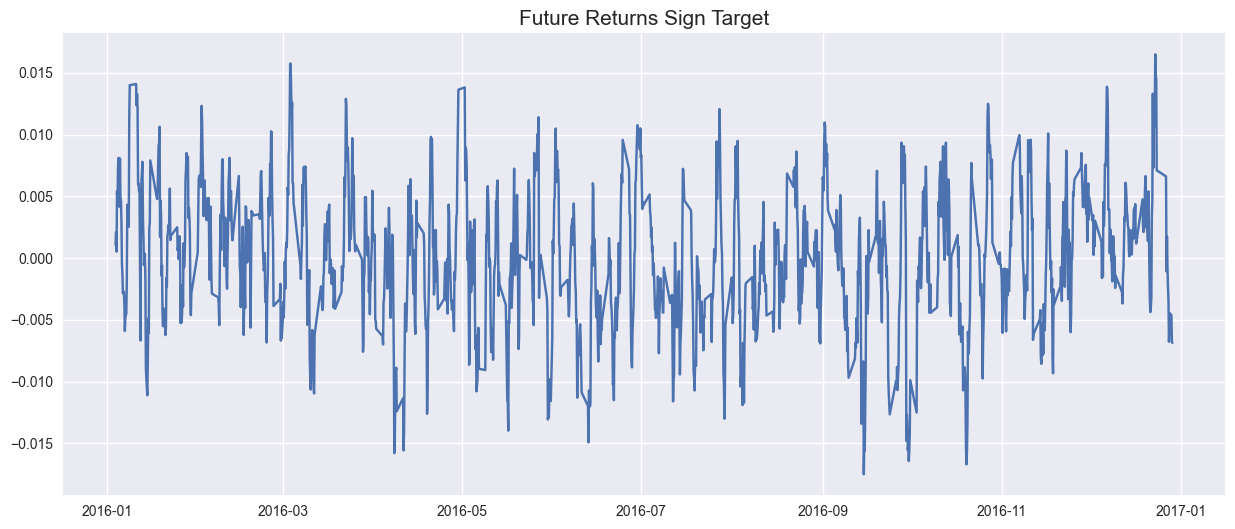

In [4]:
plt.figure(figsize=(15,6))
plt.plot(df["label"])
plt.title("Future Returns Target", size=15)
plt.show()

<br>

## **Future Volatility**

The `future_volatility` function estimates **future market volatility** using several common models: 
[`close_to_close`](/../features-engineering/volatility/#ctc-volatility), 
[`parkinson`](/../features-engineering/volatility/#parkinson-volatility),
[`rogers_satchell`](/../features-engineering/volatility/#rogers-satchell-volatility),
[`yang_zhang`](/../features-engineering/volatility/#yang-zhang-volatility).

In [6]:
df["label"] = te.magnitude.future_volatility(df, method='yang_zhang', window_size=10, open_col="open", high_col="high", low_col="low", close_col="close")
df["label"]

time
2016-01-04 00:00:00         NaN
2016-01-04 04:00:00         NaN
2016-01-04 08:00:00         NaN
2016-01-04 12:00:00         NaN
2016-01-04 16:00:00         NaN
                         ...   
2016-12-30 04:00:00    0.001797
2016-12-30 08:00:00    0.001842
2016-12-30 12:00:00    0.001724
2016-12-30 16:00:00    0.001629
2016-12-30 20:00:00    0.001601
Name: label, Length: 1548, dtype: float64

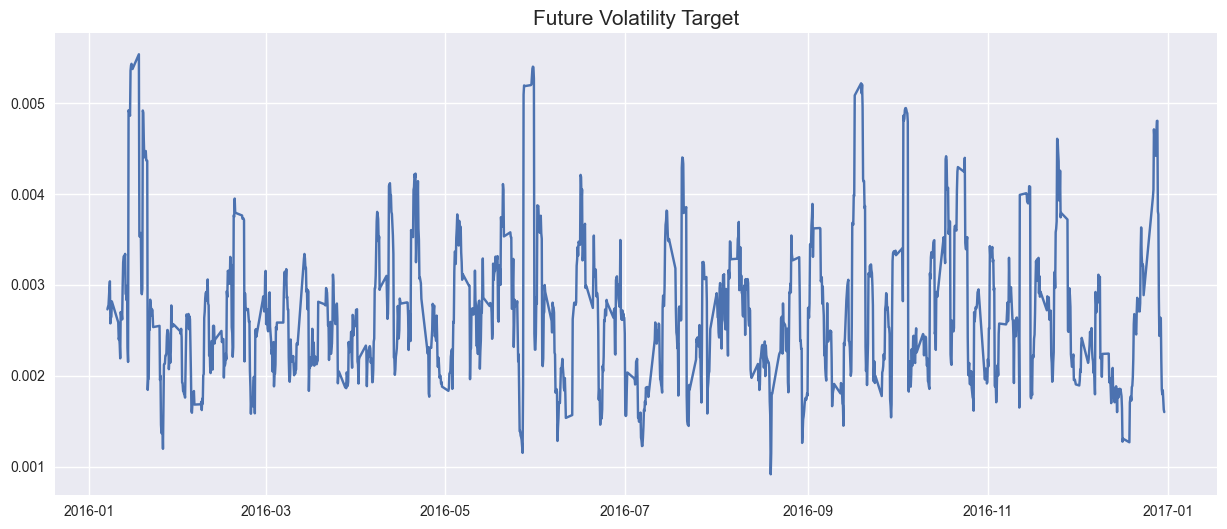

In [7]:
plt.figure(figsize=(15,6))
plt.plot(df["label"])
plt.title("Future Volatility Target", size=15)
plt.show()